## Capstone Project - The Battle of Neighborhoods (Week 2)

In [1]:
# Import libraries with reasons

# Need to use pandas dataframe
import pandas as pd
from pandas import DataFrame

# library to handle data in a vectorized manner
import numpy as np 

# library to handle requests
import requests 

# Toreplace multiple strings in one go
import re

# module to convert an address into latitude and longitude values
import geocoder
from geopy.geocoders import Nominatim 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import folium

from pandas.io.json import json_normalize

print ("Libries imported")

Libries imported


In [2]:
# Reading the wikipedia and extracting the district info to list
lt_dist_md = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Madrid')
print ("List got created with Madrid district info")

List got created with Madrid district info


In [3]:
# Transferring List to Dataframe
df_dist_md = DataFrame (lt_dist_md[1])
print ('District dataframe created')

District dataframe created


In [4]:
# Data cleansing

# Removing unwanted column
df_dist_md.pop('Location')

# Renaming columns
df_dist_md.rename(columns={"District Number": "Number", "District area[n 1] (Ha.)": "Area (KM Sqr.)","Population density(Hab./Ha.)":"Population density(/KM Sqr.)", "Administrative wards":"Ward"}, inplace = True)

In [5]:
# Calculations....

# Changing Area from Hectare to KM Square
df_dist_md['Area (KM Sqr.)'] = round(df_dist_md['Area (KM Sqr.)'] * 0.01, 2)

# Changing Population density as per KM Square
df_dist_md['Population density(/KM Sqr.)'] = round(df_dist_md['Population'] / df_dist_md['Area (KM Sqr.)'], 2)

# Removing IsNull values
df_dist_md.drop(df_dist_md[df_dist_md['Number'].isnull()].index, inplace = True)

In [6]:
# Spliting wards and putting into a new DataFrame
char_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

C1=[]
C2=[]
C3=[]

for ind1 in df_dist_md.index: 
    for ind2 in re.sub("|".join(char_list), "", df_dist_md['Ward'][ind1]).split('()'):
        if len(ind2) > 0:
            C1.append(df_dist_md['Number'][ind1])
            C2.append(df_dist_md['Name'][ind1])
            C3.append(ind2)

df_ward_md = pd.DataFrame(C1,columns=['Number'])
df_ward_md['Name'] = C2
df_ward_md['Ward'] = C3

In [7]:
# Adding Latitude and Longitude columns for Districts and Wards
df_dist_md[['Lat', 'Lon']] = pd.DataFrame([[0, 0]])
df_ward_md[['Lat', 'Lon']] = pd.DataFrame([[0, 0]])

In [8]:
# Checking the shape of the DataFrames
print ('Mardir District => ', df_dist_md.shape)
print ('Mardir Ward => ', df_ward_md.shape)

Mardir District =>  (21, 8)
Mardir Ward =>  (131, 5)


#### Lets see the Madrid district details

As we have extracted the district details, let's have alook of all districts infos. i.e. Name, Number, Area, Population, Density

In [9]:
df_dist_md[['Number', 'Name', 'Area (KM Sqr.)', 'Population', 'Population density(/KM Sqr.)']]

,Number,Name,Area (KM Sqr.),Population,Population density(/KM Sqr.)
0,1.0,Centro,5.23,131928,25225.24
1,2.0,Arganzuela,6.46,151965,23523.99
2,3.0,Retiro,5.47,118516,21666.54
3,4.0,Salamanca,5.39,143800,26679.04
4,5.0,Chamartín,9.18,143424,15623.53
5,6.0,Tetuán,5.37,153789,28638.55
6,7.0,Chamberí,4.68,137401,29359.19
7,8.0,Fuencarral-El Pardo,237.84,238756,1003.85
8,9.0,Moncloa-Aravaca,46.53,116903,2512.42
9,10.0,Latina,25.43,233808,9194.18


#### Lets findout the number of wards each district is having

In [10]:
df_ward_md.groupby(['Name']).count().reset_index()[['Name', 'Number']]

,Name,Number
0,Arganzuela,7
1,Barajas,5
2,Carabanchel,7
3,Centro,6
4,Chamartín,6
5,Chamberí,6
6,Ciudad Lineal,9
7,Fuencarral-El Pardo,8
8,Hortaleza,6
9,Latina,7


#### Lets see the district wise wards

As we have extracted the district wise wards, let's have alook of all districts & wards 

In [11]:
df_ward_md[['Number', 'Name', 'Ward']]

,Number,Name,Ward
0,1.0,Centro,Palacio
1,1.0,Centro,Embajadores
2,1.0,Centro,Cortes
3,1.0,Centro,Justicia
4,1.0,Centro,Universidad
...,...,...,...
126,21.0,Barajas,Alameda de Osuna
127,21.0,Barajas,Aeropuerto
128,21.0,Barajas,Casco Histórico de Barajas
129,21.0,Barajas,Timón


#### Updating below the Latitude & Longitude for all districts and wards to get the venues and generate the maps  

In [12]:
geolocator = Nominatim(user_agent="foursquare_agent")

# Updating the Latitude & Longitude for District DataFrame
for ind1 in df_dist_md.index: 
    address = df_dist_md['Name'][ind1] + ', Madrid, Spain'
    location = geolocator.geocode(address)

    if isinstance(location, type(None)): 
        df_dist_md['Lat'][ind1] = 0
        df_dist_md['Lon'][ind1] = 0
    else:
        df_dist_md['Lat'][ind1] = location.latitude
        df_dist_md['Lon'][ind1] = location.longitude
    
# Updating the Latitude & Longitude for Ward DataFrame
for ind1 in df_ward_md.index: 
    address = df_ward_md['Ward'][ind1] + ', Madrid, Spain'
    location = geolocator.geocode(address)
    
    if isinstance(location, type(None)): 
        df_ward_md['Lat'][ind1] = 0
        df_ward_md['Lon'][ind1] = 0
    else:
        df_ward_md['Lat'][ind1] = location.latitude
        df_ward_md['Lon'][ind1] = location.longitude

/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/debesh/anaconda3/lib/python3

### Below is the Histogram of Madrid Districts Population 

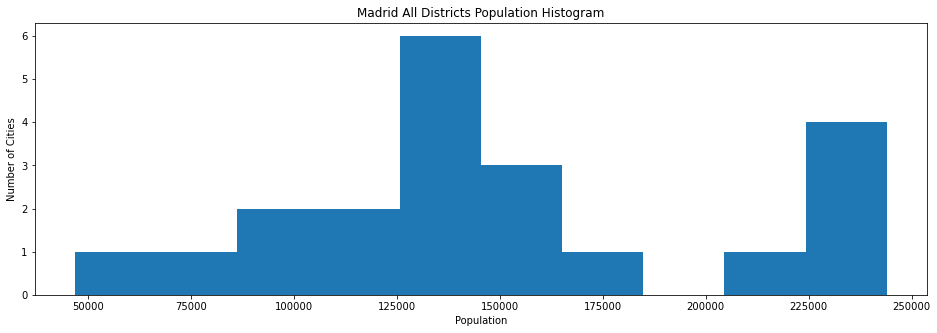

In [13]:
count, bin_edges = np.histogram(df_dist_md['Population'])
df_dist_md['Population'].plot(kind='hist', figsize=(16, 5))
plt.title('Madrid All Districts Population Histogram')
plt.ylabel('Number of Cities')
plt.xlabel('Population')
plt.show()

In [14]:
# Creating a function to generate Folium map based on different parameters

def CustomMap (Map, latitudes, longitudes, LocationNames, Area):

    for lat,lng,city, Area in zip(latitudes, longitudes, LocationNames, Area):
        label = '{}, {}'.format(city, str(Area))
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map) 

### Below is the Madrid map highlighting the districts
#### On selecting the district point, it will display the name and area

In [15]:
Map = folium.Map(location=[40.4168, -3.7038], zoom_start=10)
CustomMap (Map, df_dist_md['Lat'], df_dist_md['Lon'],df_dist_md['Name'], df_dist_md['Area (KM Sqr.)'].astype(str) + ' KM Sqr.')
Map

In [16]:
### This section is going to set the Foursquare static parameters
CLIENT_ID = 'TAKDVTLNQKNRLAMYHVJ4GFRSCWBDTTMY2UOEEBZ5KD4HT1G3' # DR
CLIENT_SECRET = 'AKXUKTLJD0KFMKCTVO11A3F5Y2EHN5BIE3HSDTAXPK1P1IL1' # DR
VERSION = '20200807'
LIMIT = 25
radius = 1000
print ('Completed the Foursquare parameters setting')

Completed the Foursquare parameters setting


In [17]:
# Creating the function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
# Creating a new DataFrame to store the District wise results
df_dist_result_md = pd.DataFrame()
df_dist_result_md['Number'] = 1
df_dist_result_md['Name'] = 2
df_dist_result_md['Venue'] = 3
df_dist_result_md['Category'] = 4
df_dist_result_md['Lat'] = 5
df_dist_result_md['Lon'] = 6

In [19]:
# Setting the values to the District wise detail DataFrame

for ind1 in df_dist_md.index: 
    if df_dist_md['Lat'][ind1] != 0 and df_dist_md['Lon'][ind1] != 0:
        latitude = df_dist_md['Lat'][ind1]
        longitude = df_dist_md['Lon'][ind1]

        ### Setting the dynamic URL, getting the result and storing into DataFrame
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
        results = requests.get(url).json()
        df_result = json_normalize(results['response']['venues'])

        # keep only columns that include venue name, and anything that is associated with location
        req_cols = ['name', 'categories'] + [col for col in df_result.columns if col.startswith('location.')] + ['id']
        df_result_req = df_result.loc[:, req_cols]

        # filter the category for each row
        df_result_req['categories'] = df_result_req.apply(get_category_type, axis=1)

        # clean column names by keeping only last term
        df_result_req.columns = [column.split('.')[-1] for column in df_result_req.columns]

        for ind2 in df_result_req.index: 
            df_dist_result_md = df_dist_result_md.append({'Number': df_dist_md['Number'][ind1], 'Name':df_dist_md['Name'][ind1], 'Venue': df_result_req['name'][ind2], 'Category': df_result_req['categories'][ind2], 'Lat': df_result_req['lat'][ind2], 'Lon':df_result_req['lng'][ind2]}, ignore_index=True)

/home/debesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


### As we have total 21 districts in Madrid, we'll check the district wise venues and their corresponding category
This will be a manual process (instead of keeping in a loop), as we need to check each details and based on personal choice one can decide the location to stay 

#### District details
We set set the district number for any of the above mentioned districts and get the below details

In [20]:
dist = 15

#### Now select the specific district name

In [21]:
df_dist_md[df_dist_md["Number"] == dist][['Number', 'Name', 'Area (KM Sqr.)', 'Population', 'Population density(/KM Sqr.)']]

,Number,Name,Area (KM Sqr.),Population,Population density(/KM Sqr.)
14,15.0,Ciudad Lineal,11.43,212529,18593.96


#### Now select the Wards for the specific district

In [22]:
df_ward_md.loc[df_ward_md['Number'] == dist][['Name', 'Ward']]

,Name,Ward
91,Ciudad Lineal,Ventas
92,Ciudad Lineal,Pueblo Nuevo
93,Ciudad Lineal,Quintana
94,Ciudad Lineal,Concepción
95,Ciudad Lineal,San Pascual
96,Ciudad Lineal,San Juan Bautista
97,Ciudad Lineal,Colina
98,Ciudad Lineal,Atalaya
99,Ciudad Lineal,Costillares


#### Now create the Folium map for that district showing all wards

In [23]:
Map = folium.Map(location=[df_ward_md.loc[df_ward_md['Number'] == dist]['Lat'].mean(), df_ward_md.loc[df_ward_md['Number'] == dist]['Lon'].mean()], zoom_start=14)
CustomMap (Map,df_ward_md.loc[df_ward_md['Number'] == dist]['Lat'], df_ward_md.loc[df_ward_md['Number'] == dist]['Lon'], df_ward_md.loc[df_ward_md['Number'] == dist]['Name'], df_ward_md.loc[df_ward_md['Number'] == dist]['Ward'])
Map

#### Now show the venue categories & count of the district

In [24]:
df_dist_result_md.loc[df_dist_result_md['Number'] == dist].groupby(['Name','Category']).count().reset_index()[['Name', 'Category', 'Number']]

,Name,Category,Number
0,Ciudad Lineal,Automotive Shop,1
1,Ciudad Lineal,Bakery,1
2,Ciudad Lineal,Boutique,1
3,Ciudad Lineal,Building,1
4,Ciudad Lineal,Candy Store,1
5,Ciudad Lineal,Car Wash,1
6,Ciudad Lineal,Clothing Store,2
7,Ciudad Lineal,Cosmetics Shop,1
8,Ciudad Lineal,Coworking Space,1
9,Ciudad Lineal,Hospital,1


#### Now show the each venue & corresponding categorie of the district

In [25]:
df_dist_result_md.loc[df_dist_result_md['Number'] == dist][['Name', 'Category', 'Venue']]

,Name,Category,Venue
350,Ciudad Lineal,Candy Store,Chocolat Factory C.C. Arturo Soria Plaza
351,Ciudad Lineal,Bakery,Pastelería Vait
352,Ciudad Lineal,Office,AXPE Consulting
353,Ciudad Lineal,Automotive Shop,Cuzco Motor Bmw
354,Ciudad Lineal,Supermarket,Sánchez Romero
355,Ciudad Lineal,Ice Cream Shop,Taruffi
356,Ciudad Lineal,Shopping Mall,C.C. Arturo Soria Plaza
357,Ciudad Lineal,Spanish Restaurant,La Chulapona
358,Ciudad Lineal,Spanish Restaurant,El Mirador de la CEA
359,Ciudad Lineal,Car Wash,Chapó Arturo Soria


#### Now create the Folium map showing  surrounding all venues of the district

In [26]:
Map = folium.Map(location=[df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lat'].mean(), df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lon'].mean()], zoom_start=15)
CustomMap (Map,df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lat'], df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lon'], df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Venue'], df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Category'])
Map

#### Now lets do the same exercise for say district number 20

In [27]:
dist = 20

In [28]:
### Now select the specific district name
df_dist_md[df_dist_md["Number"] == dist][['Number', 'Name', 'Area (KM Sqr.)', 'Population', 'Population density(/KM Sqr.)']]

,Number,Name,Area (KM Sqr.),Population,Population density(/KM Sqr.)
19,20.0,San Blas-Canillejas,22.29,154357,6924.94


In [29]:
### Now select the Wards of that district
df_ward_md.loc[df_ward_md['Number'] == dist][['Name', 'Ward']]

,Name,Ward
118,San Blas-Canillejas,Simancas
119,San Blas-Canillejas,Hellín
120,San Blas-Canillejas,Amposta
121,San Blas-Canillejas,Arcos
122,San Blas-Canillejas,Rosas
123,San Blas-Canillejas,Rejas
124,San Blas-Canillejas,Canillejas
125,San Blas-Canillejas,Salvador


In [30]:
### Now create the Folium map with the Wards of that district
Map = folium.Map(location=[df_ward_md.loc[df_ward_md['Number'] == dist]['Lat'].mean(), df_ward_md.loc[df_ward_md['Number'] == dist]['Lon'].mean()], zoom_start=14)
CustomMap (Map,df_ward_md.loc[df_ward_md['Number'] == dist]['Lat'], df_ward_md.loc[df_ward_md['Number'] == dist]['Lon'], df_ward_md.loc[df_ward_md['Number'] == dist]['Name'], df_ward_md.loc[df_ward_md['Number'] == dist]['Ward'])
Map

In [31]:
### Now show the venue categories & count of the district
df_dist_result_md.loc[df_dist_result_md['Number'] == dist].groupby(['Name','Category']).count().reset_index()[['Name', 'Category', 'Number']]

,Name,Category,Number
0,San Blas-Canillejas,Bank,2
1,San Blas-Canillejas,Bar,2
2,San Blas-Canillejas,Brewery,1
3,San Blas-Canillejas,Café,1
4,San Blas-Canillejas,Coffee Shop,1
5,San Blas-Canillejas,Cosmetics Shop,1
6,San Blas-Canillejas,Diner,1
7,San Blas-Canillejas,General Entertainment,1
8,San Blas-Canillejas,Gym,1
9,San Blas-Canillejas,Italian Restaurant,1


In [32]:
### Now show the each venue and corresponding categorie of the district
df_dist_result_md.loc[df_dist_result_md['Number'] == dist][['Name', 'Category', 'Venue']]

,Name,Category,Venue
475,San Blas-Canillejas,Italian Restaurant,Piazza Italia
476,San Blas-Canillejas,Medical Center,Centro de Salud Los Alpes
477,San Blas-Canillejas,Bank,BBVA oficina 2273
478,San Blas-Canillejas,Pizza Place,Domino's Pizza
479,San Blas-Canillejas,Soccer Stadium,Estadio Wanda Metropolitano
480,San Blas-Canillejas,Yoga Studio,Yoga Dhairyam
481,San Blas-Canillejas,None,Animal Party
482,San Blas-Canillejas,Pet Service,Centro Veterinario Los Alpes I
483,San Blas-Canillejas,School,CEIP Julián Marías
484,San Blas-Canillejas,Playground,Parque Sofía con Manchester


In [33]:
### Now create the Folium map each venue and corresponding categorie of the district
Map = folium.Map(location=[df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lat'].mean(), df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lon'].mean()], zoom_start=15)
CustomMap (Map,df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lat'], df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Lon'], df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Venue'], df_dist_result_md.loc[df_dist_result_md['Number'] == dist]['Category'])
Map